In [89]:
import pandas as pd
import numpy as np
import spacy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Input, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

In [90]:
df = pd.read_csv('email_text.csv')

In [91]:
nlp = spacy.load('en_core_web_lg')

In [92]:
docs = []
vectors = []

for doc in nlp.pipe(list(df['text'].astype('unicode').values)):
    docs.append(doc)
    vectors.append(doc.vector)

df['docs'] = docs
df['vectors'] = vectors

In [93]:
df.head()

,label,text,docs,vectors
0,1,do you feel the pressure to perform and not ri...,"(do, you, feel, the, pressure, to, perform, an...","[0.020407468, 0.18639445, -0.22375458, 0.07442..."
1,0,hi i've just updated from the gulus and i chec...,"(hi, i, 've, just, updated, from, the, gulus, ...","[-0.00534223, -0.0024206063, -0.08690389, 0.03..."
2,1,mega authenticv i a g r a discount pricec i a ...,"(mega, authenticv, i, a, g, r, a, discount, pr...","[-0.10536327, 0.16324717, -0.24092703, 0.02267..."
3,1,hey billy it was really fun going out the othe...,"(hey, billy, it, was, really, fun, going, out,...","[-0.06515988, 0.16997385, -0.18913417, -0.0739..."
4,1,system of the home it will have the capabiliti...,"(system, of, the, home, it, will, have, the, c...","[-0.026174737, 0.1281438, -0.12573622, -0.0870..."


In [94]:
x_train, x_test, y_train, y_test = train_test_split(vectors, df['label'], test_size=0.15, random_state=42)

In [95]:
svc = SVC(kernel='linear')

In [96]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [97]:
y_pred = svc.predict(x_test)

In [98]:
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [99]:
display(f1)

0.9739810161920714

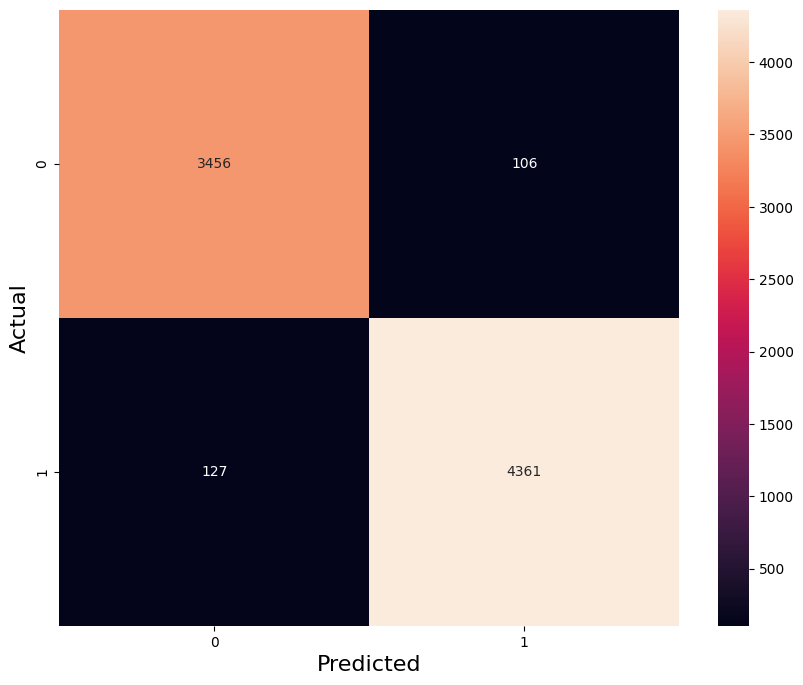

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.gca().set_xlabel("Predicted", fontsize=16)
plt.gca().set_ylabel("Actual", fontsize = 16)
plt.show()

In [101]:
vector_df = pd.DataFrame(vectors)

In [102]:
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.020407,0.186394,-0.223755,0.074425,0.087116,-0.148284,-0.039051,-0.040254,0.037040,2.280746,...,-0.191366,0.075680,-0.054279,-0.121531,0.100714,0.010305,0.006186,-0.046437,0.050120,0.083462
1,-0.005342,-0.002421,-0.086904,0.037699,0.028351,0.113485,0.072569,-0.258188,0.087588,1.195955,...,-0.077495,0.005488,0.022490,0.028088,0.079588,-0.098093,0.037508,-0.116859,-0.027848,0.146448
2,-0.105363,0.163247,-0.240927,0.022671,0.197806,0.024220,0.144255,-0.200788,0.104131,1.159972,...,-0.024645,-0.073293,-0.105712,-0.186111,0.297109,-0.136390,-0.029520,-0.150299,0.116108,0.224963
3,-0.065160,0.169974,-0.189134,-0.073910,0.068310,0.003586,-0.028931,-0.140860,0.013613,2.234762,...,-0.225698,-0.008102,0.027338,-0.071169,0.093086,-0.047363,-0.054993,-0.042238,0.089142,0.114002
4,-0.026175,0.128144,-0.125736,-0.087098,0.073217,-0.000248,0.012820,-0.067556,-0.002530,2.163235,...,-0.263583,0.004732,0.011923,-0.069353,0.056981,-0.010251,-0.027309,-0.035690,0.039517,0.144970


In [103]:
x_train_dl, x_test_dl, y_train_dl, y_test_dl = train_test_split(vector_df, df['label'], test_size=0.15, random_state=42)

In [104]:
model = Sequential()

In [105]:
model.add(Input((x_train_dl.shape[1],)))
model.add(Dense(x_train_dl.shape[1], activation='relu'))
model.add(Dense(x_train_dl.shape[1] * 2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [106]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
history = model.fit(x_train_dl, y_train_dl, batch_size = 32, epochs = 20, validation_split = 0.1)

Epoch 1/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9415 - loss: 0.1518 - val_accuracy: 0.9787 - val_loss: 0.0621
Epoch 2/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9837 - loss: 0.0517 - val_accuracy: 0.9807 - val_loss: 0.0596
Epoch 3/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9847 - val_loss: 0.0444
Epoch 4/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9855 - val_loss: 0.0476
Epoch 5/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9807 - val_loss: 0.0617
Epoch 6/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9912 - loss: 0.0300 - val_accuracy: 0.9873 - val_loss: 0.0374
Epoch 7/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9923 - loss: 0.0252 - val_accuracy: 0.9866 - val_loss: 0.0394
Epoch 8/20
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9923 -

In [108]:
predictions = model.predict(x_test_dl)
predictions = (predictions[:, 0] > 0.5).astype(np.int8)
print("Accuracy: %", accuracy_score(y_test_dl, predictions) * 100)

correct_preds = (y_test_dl == predictions)
print("That means that out of", y_test_dl.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: % 99.25465838509317
That means that out of 8050 test samples, this model got 7990 correct and 60 incorrect


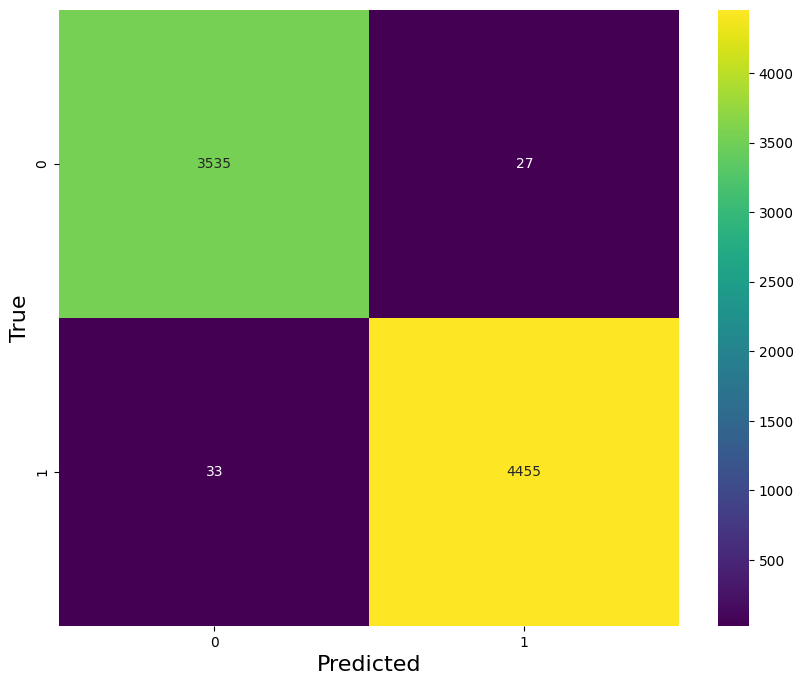

In [109]:
cm_dl = confusion_matrix(y_test_dl, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dl, cmap="viridis", annot=True, fmt='g')
plt.gca().set_xlabel("Predicted", fontsize=16)
plt.gca().set_ylabel("True", fontsize = 16)
plt.show()

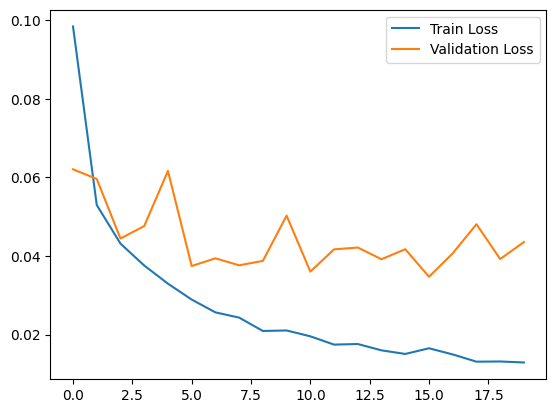

In [110]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

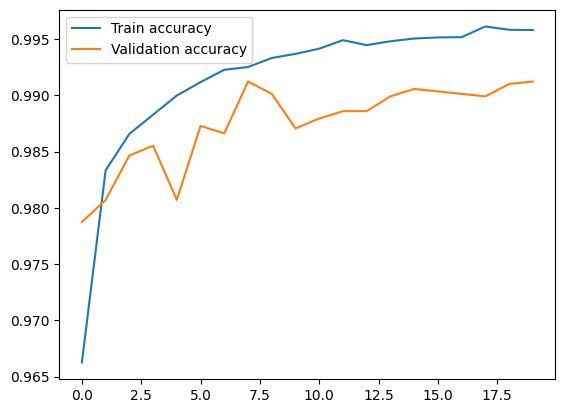

In [111]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [112]:
i = np.random.choice(np.where(~correct_preds)[0])

display(df.iloc[i].text)

print("This mail has label ", y_test_dl.iloc[i])
print()
print("Your model ranked its predictions this way: \n")
print(predictions[i])

"on behalf of the parrot team i'm proud to announce parrot escapenumber escapenumber escapenumber tax bird parrot http parrotcode org is a virtual machine aimed at running all dynamic languages parrot escapenumber escapenumber escapenumber can be obtained via cpan soon or follow the download instructions at http parrotcode org source html for those who would like to develop on parrot or help develop parrot itself we recommend using subversion or svk on the source code repository to get the latest and best parrot code parrot escapenumber escapenumber escapenumber news compilers imcc added documentation for c based parrot calling conventions refactorings and bug fixes pge new escapelong front end reflecting recent sescapenumber syntax changes pirc new prototype pir parser languages updated lua php plumhead basic pynie lua implements environment design pddescapenumber objects details added and draft approved documentation added guidelines for pmc documentation implementation pddescapenumb

This mail has label  1

Your model ranked its predictions this way: 

0


In [113]:
model.save(f'{np.int32(accuracy_score(y_test_dl, predictions) * 10000)}.keras')

In [114]:
model2 = Sequential()

In [115]:
model2.add(Input((x_train_dl.shape[1],)))
model2.add(Dense(x_train_dl.shape[1] * 2, activation='relu'))
model2.add(Dense(x_train_dl.shape[1] * 4, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [116]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
history2 = model2.fit(x_train_dl, y_train_dl, batch_size = 16, epochs = 50, validation_split = 0.1)

Epoch 1/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 126s 49ms/step - accuracy: 0.9465 - loss: 0.1434 - val_accuracy: 0.9794 - val_loss: 0.0656
Epoch 2/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 119s 46ms/step - accuracy: 0.9811 - loss: 0.0544 - val_accuracy: 0.9790 - val_loss: 0.0696
Epoch 3/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 113s 44ms/step - accuracy: 0.9840 - loss: 0.0488 - val_accuracy: 0.9847 - val_loss: 0.0490
Epoch 4/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 119s 46ms/step - accuracy: 0.9884 - loss: 0.0396 - val_accuracy: 0.9847 - val_loss: 0.0492
Epoch 5/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 122s 47ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9868 - val_loss: 0.0508
Epoch 6/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 116s 45ms/step - accuracy: 0.9904 - loss: 0.0308 - val_accuracy: 0.9851 - val_loss: 0.0535
Epoch 7/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 118s 46ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9901 - val_loss: 0.0453
Epoch 8/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 120s 47ms/step - accuracy: 

In [118]:
predictions2 = model2.predict(x_test_dl)
predictions2 = (predictions2[:, 0] > 0.5).astype(np.int8)
print("Accuracy: %", accuracy_score(y_test_dl, predictions2) * 100)

correct_preds2 = (y_test_dl == predictions2)
print("That means that out of", y_test_dl.shape[0] ,"test samples, this model got", 
      np.where(correct_preds2)[0].size, "correct and",
      np.where(~correct_preds2)[0].size, "incorrect")

252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Accuracy: % 99.21739130434783
That means that out of 8050 test samples, this model got 7987 correct and 63 incorrect


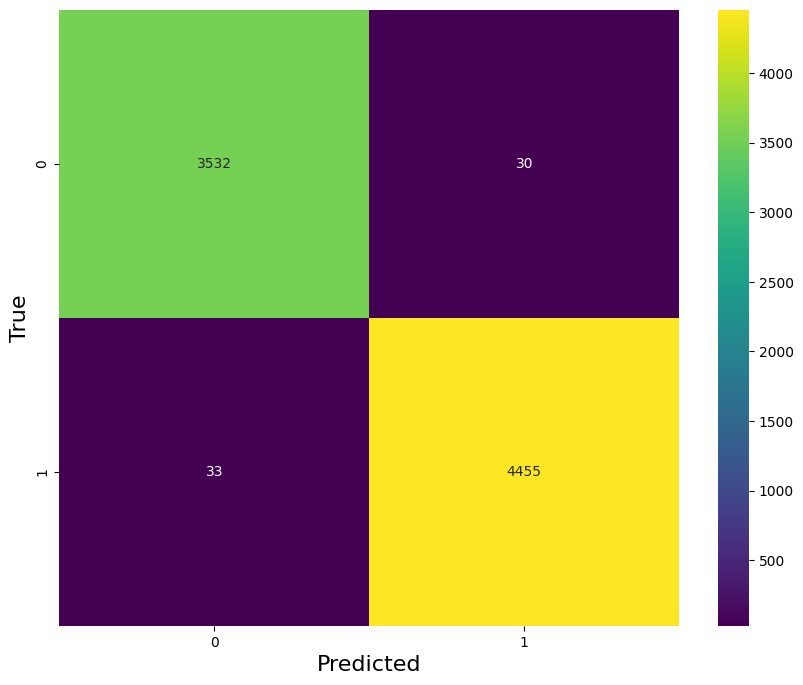

In [119]:
cm_dl2 = confusion_matrix(y_test_dl, predictions2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dl2, cmap="viridis", annot=True, fmt='g')
plt.gca().set_xlabel("Predicted", fontsize=16)
plt.gca().set_ylabel("True", fontsize = 16)
plt.show()

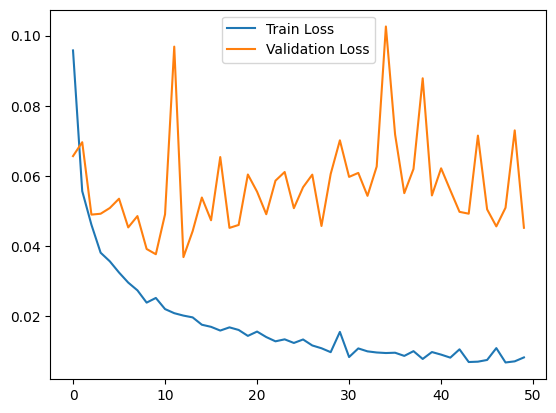

In [120]:
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

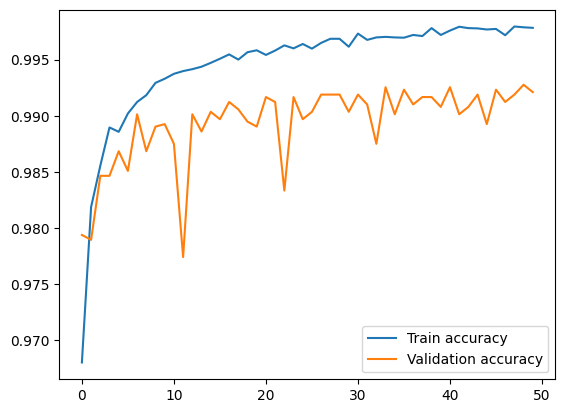

In [121]:
plt.plot(history2.history['accuracy'], label='Train accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [122]:
model2.save(f'{np.int32(accuracy_score(y_test_dl, predictions2) * 10000)}.keras')